## The basic steps for a classification task using GridSearchCV

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### step-1:  load data and clean data ( handle missing values)

In [2]:
#load data
#clean data: drop or interpolate using Pandas

### step-2: preprocess data

In [3]:
#normalization, reshape, etc if necessary

Let's generate some random data, so we can discuss the next steps 

In [4]:
#random number generator
import numpy as np
rng=np.random.RandomState(1)

In [5]:
num_samples=3000
num_features=5
num_classes=3

In [6]:
X0=rng.rand(num_samples//3, num_features) #class-0: x in range of [0, 1]
Y0=np.zeros(num_samples//3)
X1=0.5+rng.rand(num_samples//3, num_features)  #class-1: x in range of [0.5, 1.5]
Y1=np.ones(num_samples//3)
X2=1+rng.rand(num_samples//3, num_features)  #class-2: x in range of [1, 2]
Y2=2*np.ones(num_samples//3)
X=np.concatenate([X0, X1, X2])
Y=np.concatenate([Y0, Y1, Y2])

In [7]:
print(X0.min(), X0.max())
print(X1.min(), X1.max())
print(X2.min(), X2.max())

9.695068767479054e-05 0.9998757875742624
0.5002922485305992 1.4997537973236716
1.0000471291844115 1.9994551539785284


In [8]:
#usually, class label/index starts from 0
[Y.min(), Y.max()]

[0.0, 2.0]

### step-3: train-validation-test
analogy <br>
training set: homework <br>
validation set: moc exam  <br>
test set:       final exam  <br>

In [9]:
from sklearn.model_selection import train_test_split
#split the data (X,Y) into a training set (X_train, Y_train) and a test set (X_test, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
X_train.shape

(2400, 5)

### step-4: choose a machine learning model for classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# model =KNeighborsClassifier(n_neighbors=???)

### step-5: find the optimal hyper-parameter(s) of the model using training-validation

In [12]:
#create a list of possible values of the parameter n_neighbors
n_list=np.arange(1, 100, 5)

In [13]:
#create a dictionary of the hyper-parameter(s) of the model
#the KNeighborsClassifier model has only one hyper-parameter: n_neighbors
param_grid = {'n_neighbors':n_list}

In [14]:
#in general, a model can have more than one hyper-parameter
#   assume a model has 3 hyper-parameters: parameter1, parameter2, and parameter3
#   SomeModel(parameter1, parameter2, parameter3)
#   param_grid = {'parameter1': list1,
#                 'parameter2': list2,
#                 'parameter3': list3,
#                 'random_state':[0] # if the model has the random_state parameter
#}

In [15]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier() #create an empty model
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='accuracy', #read the sk-learn doc about scoring
                  cv=5) #set cv=5, then it will do 5-fold cross-validation

`scoring` is 'accuracy': the best model has the highest classification accuracy <br>
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [16]:
gs.fit(X_train, Y_train)  # it will do 5-fold cross-validation if cv=5
#here, (X_train, Y_train) contain the "pure" training data and the validation data

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='accuracy')

In [17]:
gs.cv_results_

{'mean_fit_time': array([0.00100079, 0.00059514, 0.00041156, 0.00077758, 0.00098915,
        0.00060053, 0.        , 0.003126  , 0.00312533, 0.00020127,
        0.00064592, 0.00099974, 0.00041499, 0.00060964, 0.00082769,
        0.00105338, 0.00081301, 0.00080934, 0.00089726, 0.00362682]),
 'std_fit_time': array([6.32637859e-04, 4.85988198e-04, 5.04386580e-04, 3.94539992e-04,
        2.02543003e-05, 4.90331105e-04, 0.00000000e+00, 6.25200272e-03,
        6.25066757e-03, 4.02545929e-04, 5.32200244e-04, 5.30983387e-07,
        4.78385048e-04, 4.97932257e-04, 4.15050457e-04, 1.08847876e-04,
        3.65820101e-04, 4.05363040e-04, 4.88350643e-04, 5.99791542e-03]),
 'mean_score_time': array([0.01088042, 0.00876756, 0.00918369, 0.00975995, 0.00990891,
        0.00977335, 0.0125247 , 0.0062499 , 0.00944762, 0.01502619,
        0.01242337, 0.01326199, 0.01305246, 0.01318083, 0.01327782,
        0.01368241, 0.01384706, 0.01550193, 0.01704545, 0.01658678]),
 'std_score_time': array([0.00203895, 

In [18]:
# accuracy on the validation set
acc_val_list=gs.cv_results_['mean_test_score']#"test" is validation
acc_val_list

array([0.96625   , 0.97291667, 0.9725    , 0.97416667, 0.9725    ,
       0.97291667, 0.97125   , 0.97125   , 0.97291667, 0.97166667,
       0.97208333, 0.97125   , 0.97125   , 0.97125   , 0.97083333,
       0.97041667, 0.97      , 0.97041667, 0.97041667, 0.97083333])

Text(0, 0.5, 'accuracy')

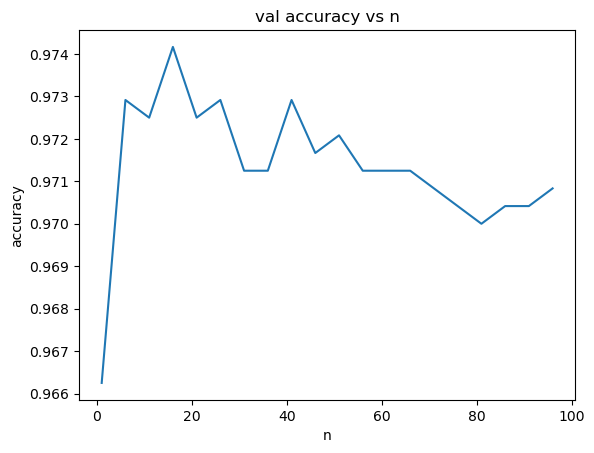

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(n_list, acc_val_list)
ax.set_title('val accuracy vs n')
ax.set_xlabel('n')
ax.set_ylabel('accuracy')

In [20]:
# the best parameter leads to the highest classification accuracy on the validation set
n_best=n_list[np.argmax(acc_val_list)]
n_best

16

In [21]:
#we can directly get the best parameter(s)
gs.best_params_ 

{'n_neighbors': 16}

In [22]:
#we could train the model again using the best parameter(s)
#   model_best=KNeighborsClassifier(n_neighbors=n_best)
#   model_best.fit(X_train, Y_train)
#we can directly use gs.best_estimator_
#it is the best model
model_best=gs.best_estimator_
model_best

KNeighborsClassifier(n_neighbors=16)

In [23]:
#measure the classification accuracy on the training set
acc_train=model_best.score(X_train, Y_train)
acc_train

0.9766666666666667

### step-6: evaluate the model on the test set (the "final exam")

In [24]:
#measure the classification accuracy on the test set
acc_test=model_best.score(X_test, Y_test)
acc_test

0.9716666666666667

In [25]:
#obtain the confusion matrix on the test set
from sklearn.metrics import accuracy_score, confusion_matrix
Y_test_pred=model_best.predict(X_test)
cm = confusion_matrix(Y_test, Y_test_pred)
cm

array([[234,   3,   0],
       [  8, 177,   2],
       [  0,   4, 172]], dtype=int64)

In [26]:
#the number of test samples
cm.sum()

600

In [27]:
#get the diagnal elements of cm
cm[np.arange(0, num_classes), np.arange(0, num_classes)]

array([234, 177, 172], dtype=int64)

In [28]:
# the number of correctly classified samples
cm[np.arange(0, num_classes), np.arange(0, num_classes)].sum()

583

In [29]:
#calculate accuracy
cm[np.arange(0, num_classes), np.arange(0, num_classes)].sum()/cm.sum()

0.9716666666666667

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       237
         1.0       0.96      0.95      0.95       187
         2.0       0.99      0.98      0.98       176

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

